# Spectral discrimination of red clumps among giant stars

Red clump stars are helium burning red giants, late in their stellar evolution and are of significant importance in astronomy. They serve as a standard candle, cosmological objects with known absolute magnitude, bright enough to be observed throughout the Milky Way, that fit the candidate for ideal distance measurements, one of the most important metrics for astronomers. Late in their age as a red-giant branch, these red-clump stars need to be distinguished from their closely related, still maturing red giant branch stars, that are growing in size as they burn hydrogen around an inert helium core. This important distinguishment and recently, fastly growing availability and size of astronomy data has led to multiple papers and interests on techniques for discovering them from traditional methods through investigating individual stellar properities to applications from neural networks both with a high degree of success. In this project, we will utilize the APOGEE dataset that provides a comprehensive set of stellar spectra and parameters, and the Kepler observations of red-clump stars to investigate applications of traditional and non-traditional machine learning techniques to distinguish red clump stars, with the goals of beating the baseline and recent simple machine learning techniques that have had ~95% and 98% accuracy respectively. 


## Asteroseismic parameters in red giants

Asteroseismic parameters are the gold standard for identifiying if a star is burning helium in its core (Hawkins, 2017). As such, it might be natural to think of how powerful a model is at predicting asteroseimics features of a star as a good indicator and measure of how well it may preform in the classification task. The most paramount features that we will look at is period spacing and large frequency spacing (Vrad, 2016) among Kepler stars with corresponding high resolution APOGEE spectra. Below is a plot at how evident the clustering becomes when asterosesimics features are revealed in stars

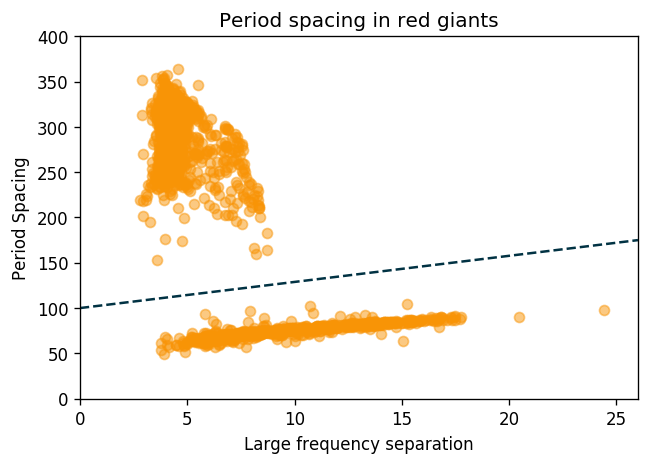

In [9]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
%matplotlib inline
from data.Kepler import KeplerPeriodSpacing
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi']= 110

kepler = KeplerPeriodSpacing()
kepler_data = kepler.get_data(version = 2, standardize = False, show_data_statistics=False)

# Plot some PS as a function of Δv
plt.scatter(kepler_data['Dnu'], kepler_data['PS'], color="#F89406", alpha = 0.5)
plt.plot([0, 26], [100, 175], linestyle='--', color='#013243')
plt.xlim(xmin=0, xmax=26)
plt.ylim(ymin=0, ymax=400)
plt.title("Period spacing in red giants")
plt.xlabel("Large frequency separation")
plt.ylabel("Period Spacing")
plt.show()

## Spectral inference

The APOGEE sky survey provides thousands of stars with high quality star spectra and sophisticated flags to manipulate data. Star spectra in the aspCapStar has around 8,500 different wavelengths and due to the relative less populated asteroseismic fields of stars, it is of interest if stellar spectra has sufficient information to infer missing asteroseismic parameters that are of interest. It is well known from StarNet and Cannon that star spectra has given highly accurate results that beat traditional methods and below, it is evident that a relatively simple neural network can outperform theses results too. 



/Users/philiptsang/.keras/keras.json


Using TensorFlow backend.


Kepler period spacing measurements with 𝚫v and APOGEE spectra
-------------------------------------------------------------
Stars: 2114
Projected size: 152.208mb


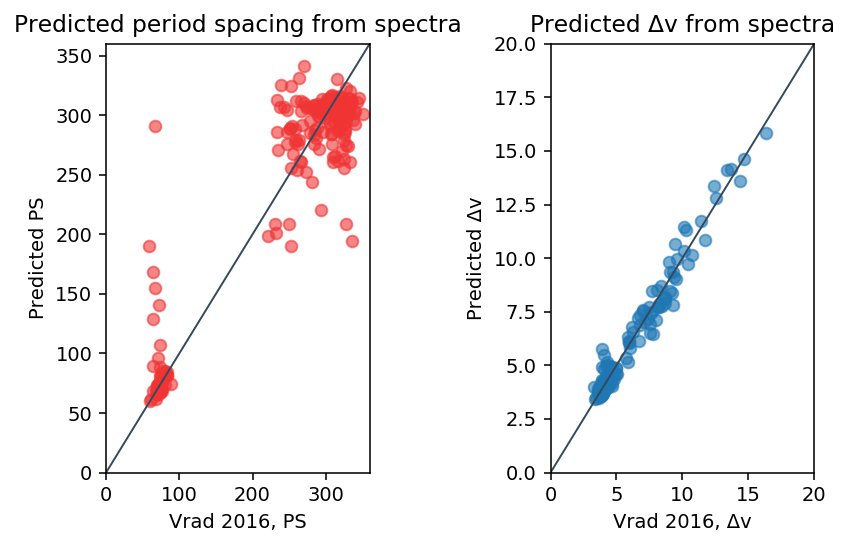

In [1]:
%matplotlib inline
from data.Kepler import KeplerPeriodSpacing
from models.spectra_embeddings.PCA import SpectralEmbeddingPCA
from models.regression.BaselineNN import BaselineNN as BaselineNNRegression
import matplotlib as mpl
PCA_COMPONENTS = 100
mpl.rcParams['figure.dpi']= 140

kepler = KeplerPeriodSpacing()
data = kepler.get_data(version = 2, standardize = False)
N = len(data['KIC'])

pca = SpectralEmbeddingPCA(PCA_COMPONENTS)
pca.fit(data['spectra'][0:int(0.9*N)])
spectra_data = pca.embed(data['spectra'])

model = BaselineNNRegression(S_D = PCA_COMPONENTS)
model.load()
model.judge(spectra_data[int(0.9*N):], [data['PS'][int(0.9*N):], data['Dnu'][int(0.9*N):]])